## Discretization with first order Euler's method. 

In [2]:
import numpy as np
import pandas as pd 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns 
import math

/var/folders/ry/cpzzpnh51yvfh6ctzlsm0jsw0000gn/T/ipykernel_29741/3318009719.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
dt = 0.2   # interval 
T = 2.0       # Total interval 
steps = T/dt  # Total steps
total_interval = np.arange(0,2.0,dt)
total_interval = torch.from_numpy(total_interval)



In [4]:
from functions.diff_eq import f  # importing the derivativees of


## Discretizing the pde using first order Euler's Forward method.

In [12]:
# we will assign an array where we will store all the solution (y) values.
# Y = torch.tensor([])

y = torch.tensor([]) # defining teh empty tensor
t = torch.tensor([]) # defining the empty time tensor
y = torch.cat((y,torch.tensor([1]))) # initial value  
t = torch.cat((t, torch.tensor([0]))) # initial time 
for i in range(len(total_interval)):
    t = torch.cat((t, torch.tensor([0.2*(i+1)])), dim = 0)
    y_next = y[i] + f(y[i], t[i])*dt
    y = torch.cat((y, torch.tensor([y_next])), dim = 0)
    
y

tensor([1.0000, 1.5000, 1.8700, 2.1230, 2.2707, 2.3236, 2.2913, 2.1821, 2.0039,
        1.7635, 1.4672])

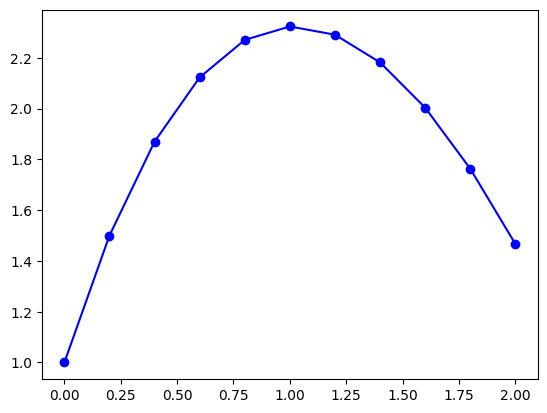

In [13]:
plt.plot(t, y, "b",label = "Alldev", marker ='o')

In [36]:
j=[]
for i in range(0,7,2):
    j.append(i)
j

[0, 2, 4, 6]

In [55]:
image = torch.tensor([[1,2,3,4,5,6],[2,3,4,5,6,7],[3,4,5,6,7,8],[4,5,6,7,8,9]])
image.unsqueeze(0)
image.shape

torch.Size([4, 6])

In [56]:
H, W = image.shape
patches = []
h_p, w_p, stride = 2,2, 2

for i in range(0, H-h_p+1,stride ):
    row_patches = []
    for j in range(0, W-w_p+1, stride):
        patch = image[i:i+stride,j:j+stride]
        row_patches.append(patch)
    patches.extend(row_patches)




In [54]:
patches

[tensor([[1, 2],
         [2, 3]]),
 tensor([[3, 4],
         [4, 5]]),
 tensor([[5, 6],
         [6, 7]]),
 tensor([[3, 4],
         [4, 5]]),
 tensor([[5, 6],
         [6, 7]]),
 tensor([[7, 8],
         [8, 9]])]

In [57]:
H, W, h_p, w_p

(4, 6, 2, 2)

In [ ]:
H_out, W_out  = (H-(h_p-1)-1)/stride +1, (W-(w_p-1)-1)/stride+1

In [60]:
H_out, W_out

(2.0, 3.0)

In [66]:
from math import floor

In [71]:
H_out

2

In [69]:
floor((H_out))

2

In [79]:
H, W = image.shape[0], image.shape[1]
H

4

In [76]:
H,W = image.shape[0:]

In [80]:
H
A = torch.tensor([1,3,4,5,7,9,2,0])

In [81]:
orted_indices = torch.argsort(A, descending=True)

In [82]:
orted_indices

tensor([5, 4, 3, 2, 1, 6, 0, 7])

In [84]:
A.size(0)

8